In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nutri = pd.read_csv('/Users/martinlopezscala/Downloads/nutri.csv')

In [3]:
nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            226 non-null    object 
 1   situation         226 non-null    object 
 2   tea               226 non-null    int64  
 3   coffee            226 non-null    int64  
 4   height            226 non-null    float64
 5   weight            226 non-null    float64
 6   age               226 non-null    float64
 7   meat              226 non-null    object 
 8   fish              226 non-null    object 
 9   raw_fruit         226 non-null    object 
 10  cooked_fruit_veg  226 non-null    object 
 11  chocol            226 non-null    object 
 12  fat               226 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 23.1+ KB


In [4]:
DICT = {1:'Male' , 2:'Female'}
nutri['gender'] = nutri['gender'] .replace(DICT).astype('category')
nutri['gender']

0      Female
1      Female
2      Female
3      Female
4      Female
        ...  
221    Female
222    Female
223      Male
224    Female
225    Female
Name: gender, Length: 226, dtype: category
Categories (2, object): ['Female', 'Male']

#Summary Tables

In [5]:
nutri['fat'].describe()

count           226
unique            8
top       sunflower
freq             68
Name: fat, dtype: object

In [6]:
nutri['fat'].value_counts()

sunflower    68
peanut       48
olive        40
margarine    27
Isio4        23
butter       15
duck          4
colza         1
Name: fat, dtype: int64

In [7]:
#Crosstable for two or more variables giving a contingency table
pd.crosstab(nutri.gender, nutri.situation)

situation,Couple,Family,Single
gender,,,
Female,56,7,78
Male,63,2,20


In [9]:
pd.crosstab(nutri.gender, nutri.situation, margins=True)

situation,Couple,Family,Single,All
gender,,,,
Female,56,7,78,141
Male,63,2,20,85
All,119,9,98,226


#Summary Statistics

In [10]:
nutri['height'].mean()

163.96017699115043

In [11]:
nutri['height'].quantile(q=[0.25,0.5,0.75])

0.25    157.0
0.50    163.0
0.75    170.0
Name: height, dtype: float64

In [12]:
#Standard desviation s- In cm
nutri['height'].max() - nutri['height'].min()

48.0

In [13]:
#Variance in cm2
round(nutri['height'].var(),2)  #round to two decimal places

81.06

In [14]:
#Standard deviation
round(nutri['height'].std(),2) 

9.0

In [16]:
round(nutri['height'].describe()) 

count    226.0
mean     164.0
std        9.0
min      140.0
25%      157.0
50%      163.0
75%      170.0
max      188.0
Name: height, dtype: float64

##Visualizing Data

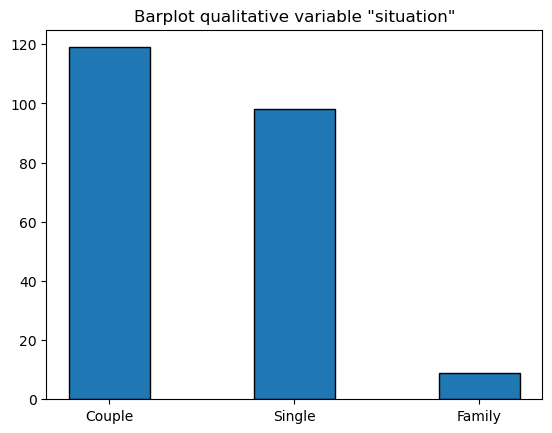

In [19]:
#Cuantas personas mayores viven solos, en pareja, con familiares u/o otro
width = 0.35 #ancho de barra
x = [0,0.8, 1.6] #posicion de las barras en eje x
situation_counts = nutri['situation'].value_counts()
plt.bar(x, situation_counts, width, edgecolor= 'black')
plt.xticks(x, situation_counts.index)
plt.title('Barplot qualitative variable "situation"')
plt.show()

##Plotting quantitative variables

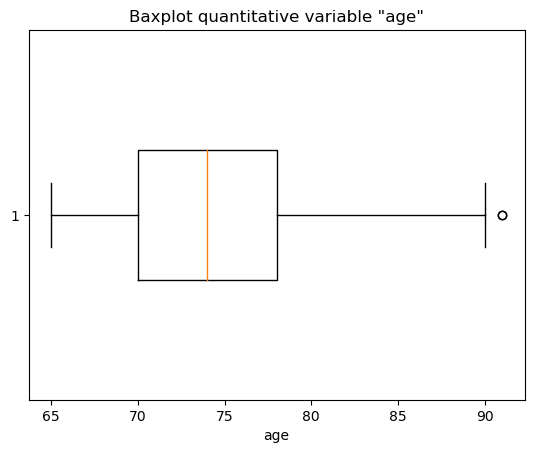

In [22]:
#Boxplor. Age
plt.boxplot(nutri['age'],widths=width, vert=False)
plt.xlabel('age')
plt.title('Baxplot quantitative variable "age"')
plt.show()

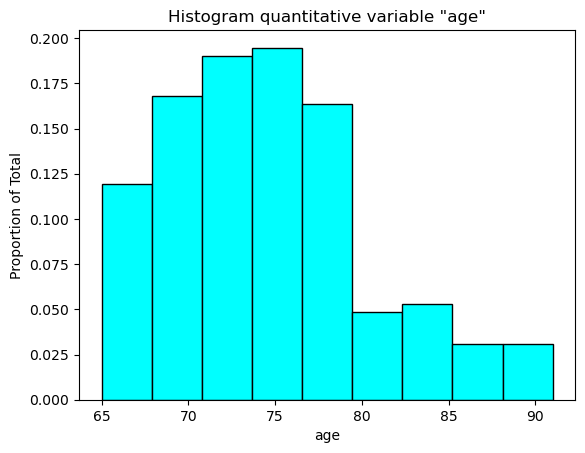

In [24]:
#Histogram. Ages
weights= np.ones_like(nutri.age)/nutri.age.count()
plt.hist(nutri.age, bins=9, weights=weights, facecolor='cyan', edgecolor='black', linewidth=1)
plt.xlabel('age')
plt.ylabel('Proportion of Total')
plt.title('Histogram quantitative variable "age"')
plt.show()

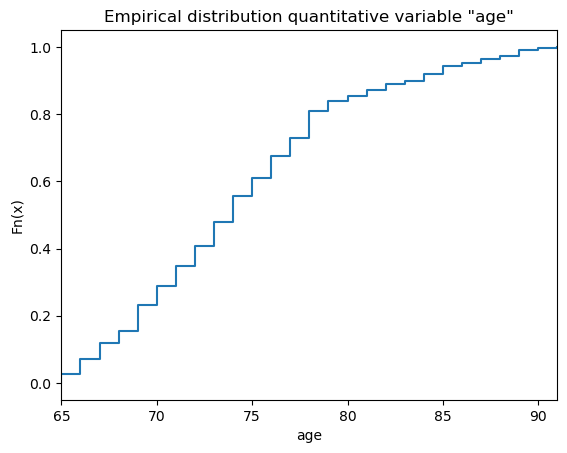

In [26]:
#Funcion distribucion acumulativa
x= np.sort(nutri.age)
y= np.linspace(0,1,len(nutri.age))
plt.xlabel('age')
plt.ylabel('Fn(x)')
plt.step(x,y)
plt.xlim(x.min(), x.max())
plt.title('Empirical distribution quantitative variable "age"')
plt.show()

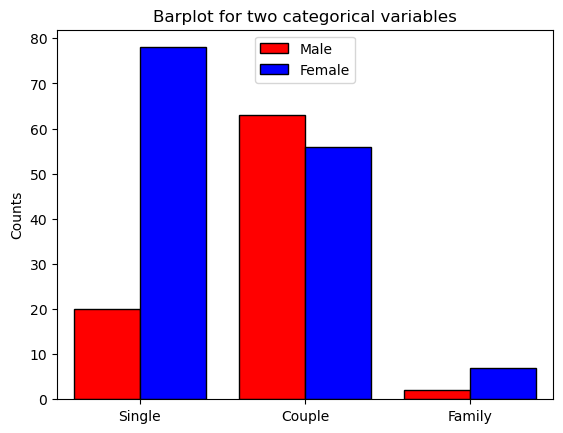

In [29]:
#Grafica de barras de dos variables
sns.countplot(x='situation', hue ='gender', data=nutri, hue_order=['Male', 'Female'], palette=['Red', 'Blue'],
             saturation = 1, edgecolor = 'black')
plt.legend(loc='upper center')
plt.xlabel('')
plt.ylabel('Counts')
plt.title('Barplot for two categorical variables')
plt.show()

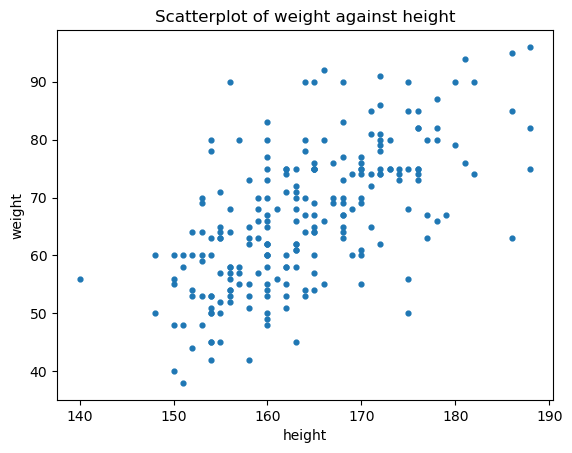

In [32]:
#Plot for two quantitative variables
plt.scatter(nutri.height, nutri.weight, s=12, marker='o')
plt.xlabel('height')
plt.ylabel('weight')
plt.title('Scatterplot of weight against height')
plt.show()

/var/folders/px/rv4mh3xn46z7059z336yx46r0000gn/T/ipykernel_899/1213774709.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bwt = bwt.drop('Unnamed: 0',1)


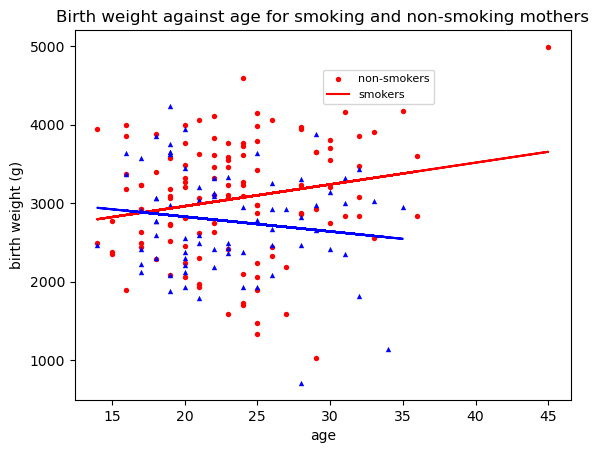

In [38]:
bwt = pd.read_csv('/Users/martinlopezscala/Downloads/birthwt.csv')
bwt = bwt.drop('Unnamed: 0',1)
styles = {0: ['o', 'red'], 1:['^', 'blue']}
for k in styles:
    grp = bwt[bwt.smoke==k]
    m,b = np.polyfit(grp.age, grp.bwt, 1)
    plt.scatter(grp.age, grp.bwt, c=styles[k][1], s=15, linewidth=0, marker=styles[k][0])
    plt.plot(grp.age, m*grp.age+b, '-', color=styles[k][1])
    
plt.xlabel('age')
plt.ylabel('birth weight (g)')
plt.legend(['non-smokers', 'smokers'],prop={'size':8}, loc=(0.5, 0.8))
plt.title('Birth weight against age for smoking and non-smoking mothers')
plt.show()


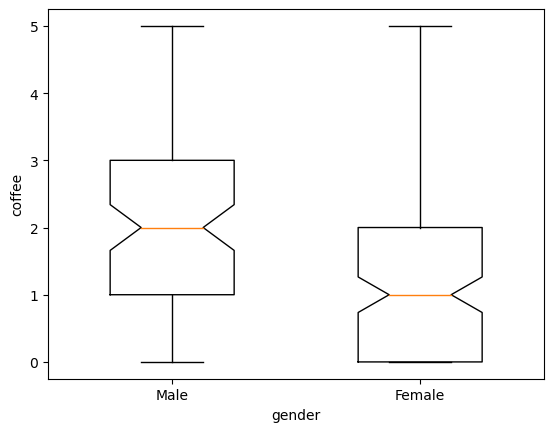

In [40]:
#Grafico con una variable cualitativa y una cuantitativa
males = nutri[nutri.gender == 'Male']
females = nutri[nutri.gender == 'Female']
plt.boxplot([males.coffee, females.coffee],notch=True, widths=(0.5, 0.5))
plt.xlabel('gender')
plt.ylabel('coffee')
plt.xticks([1,2],['Male','Female'])
plt.show()


In [53]:
mushroom = pd.read_csv('/Users/martinlopezscala/Downloads/mushrooms.csv')

In [54]:
mushroom.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [55]:
#How many features are in this data set    23
#What are the initial names and types of the features 22 
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [56]:
#Rename index[0] to edibility and index[5] to odor
newcols = mushroom.columns.tolist()
newcols[0] = 'edibility'
newcols[5] = 'odor'
mushroom.columns = newcols

In [57]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edibility                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [60]:
#Encoded columns odors and edibility with each letter
DICT = {'a': "almond", 'c': "creosote", 'f': "foul", 'l': "anise", 'm': "musty", 'n': "none", 'p': "pungent",
       's': "spicy", 'y': "fishy"}
mushroom.odor = mushroom.odor.replace(DICT)

DICT = {'e': "edible", 'p': "poisonous"}
mushroom.edibility = mushroom.edibility.replace(DICT)

In [61]:
mushroom.head(3)

,edibility,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,x,s,n,t,pungent,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,edible,x,s,y,t,almond,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,edible,b,s,w,t,anise,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [63]:
#Contingency table cross-tabulating 'edibility' and 'odor'
#Wich mushroom odors should be avoided. todos menos almond y anise
pd.crosstab(mushroom.odor, mushroom.edibility, margins=True)

edibility,edible,poisonous,All
odor,,,
almond,400,0,400
anise,400,0,400
creosote,0,192,192
fishy,0,576,576
foul,0,2160,2160
musty,0,36,36
none,3408,120,3528
pungent,0,256,256
spicy,0,576,576


In [64]:
#Proporcion de odorless mushroom seguros de comer
3408/(3408+120)

0.9659863945578231

In [65]:
#Proporcion de odorless mushroom seguros de comer. Sin la tabla
mushroom[(mushroom.edibility=='edible') & (mushroom.odor=='none')].shape[0]/mushroom[mushroom.odor=='none'].shape[0]

0.9659863945578231

In [67]:
#Crear un dataframe manual con datos de tabla
values = [[1,75,85], [2,30,50], [3,100,100], [4,50,52], [5,60,65]]
df = pd.DataFrame(values, columns=['Student', 'Before', 'After'])
                                   
#fromat dataframe as required
df = pd.melt(df, id_vars=['Student'], var_name="Time", value_vars=['Before', 'After'])
print(df)

   Student    Time  value
0        1  Before     75
1        2  Before     30
2        3  Before    100
3        4  Before     50
4        5  Before     60
5        1   After     85
6        2   After     50
7        3   After    100
8        4   After     52
9        5   After     65
